# **FINAL CODE**

# **START**

<ipython-input-6-6aa2afd43ef3>:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({"Model": [name], "R2_score": [r2], "MSE": [mse], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape], "Training Time (s)": [training_time]})], ignore_index=True)


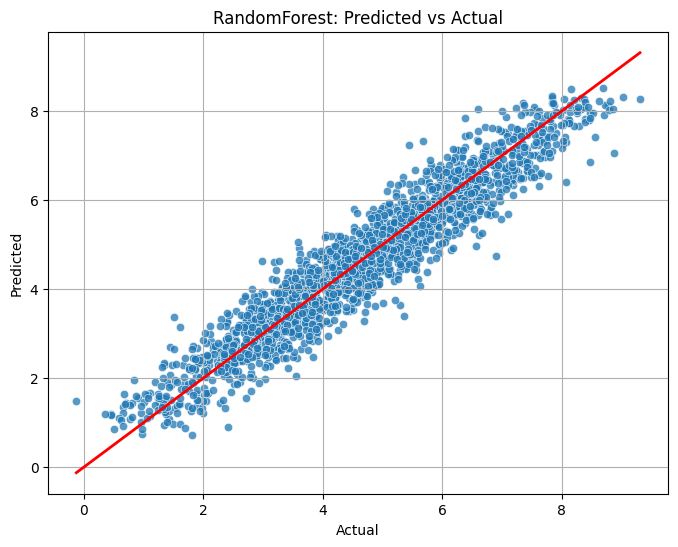

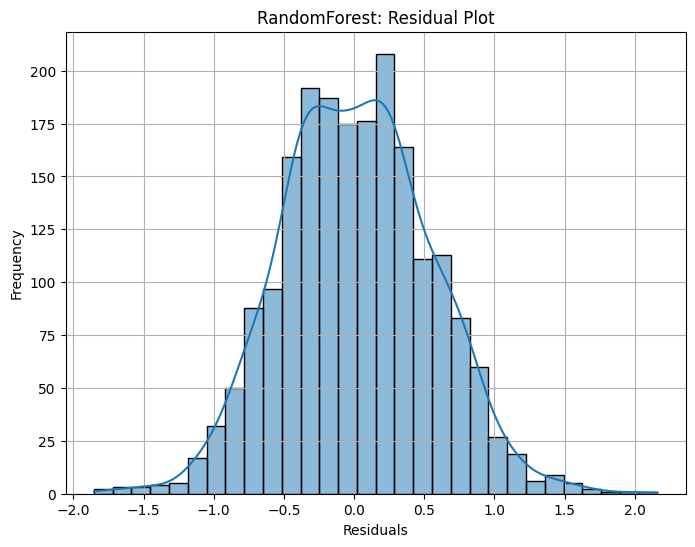

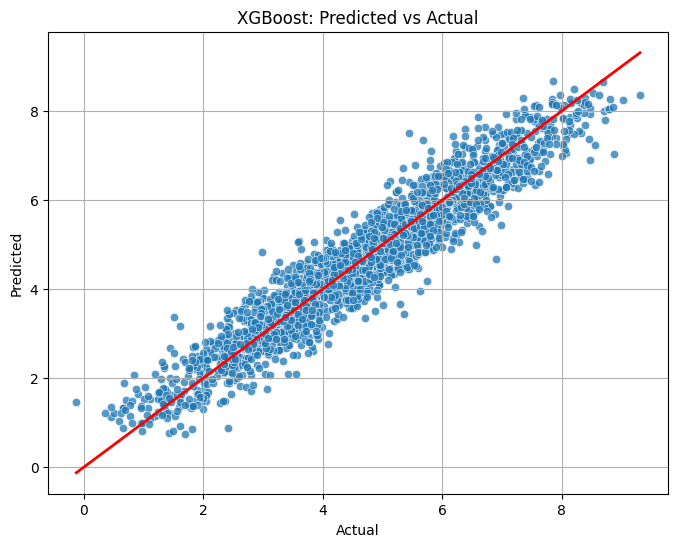

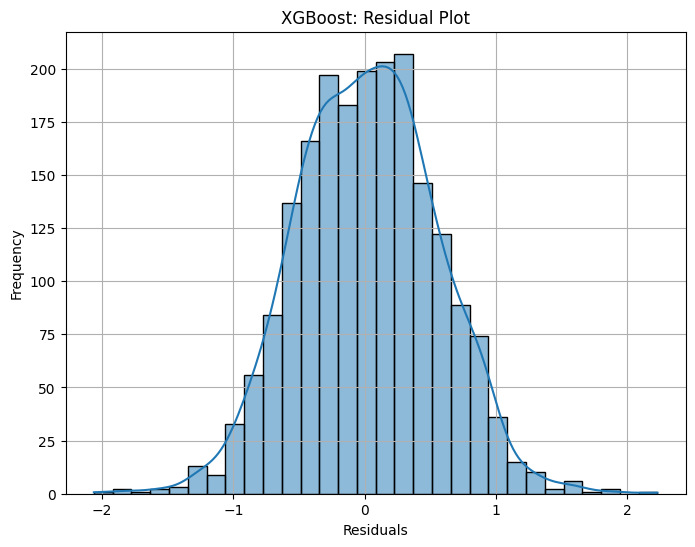

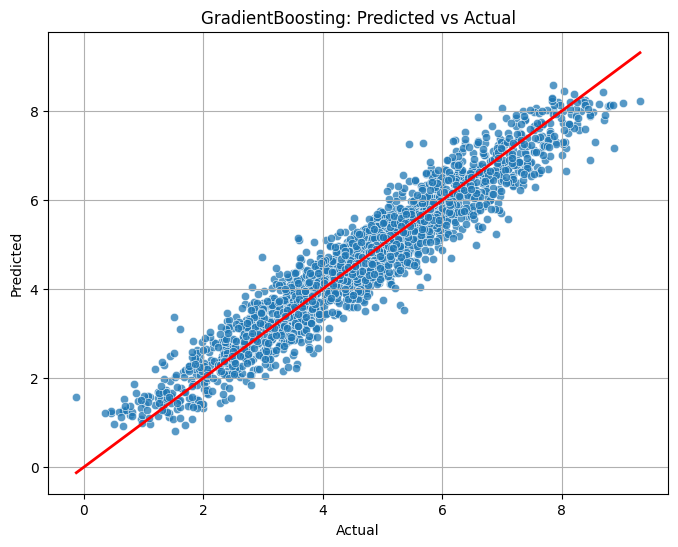

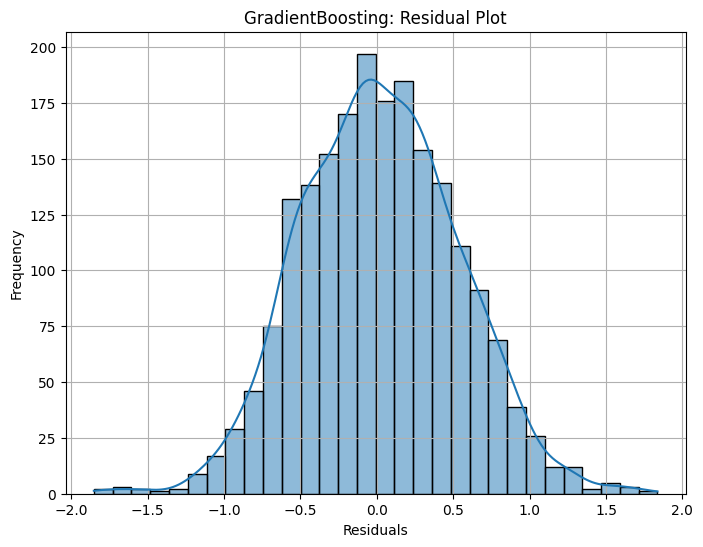

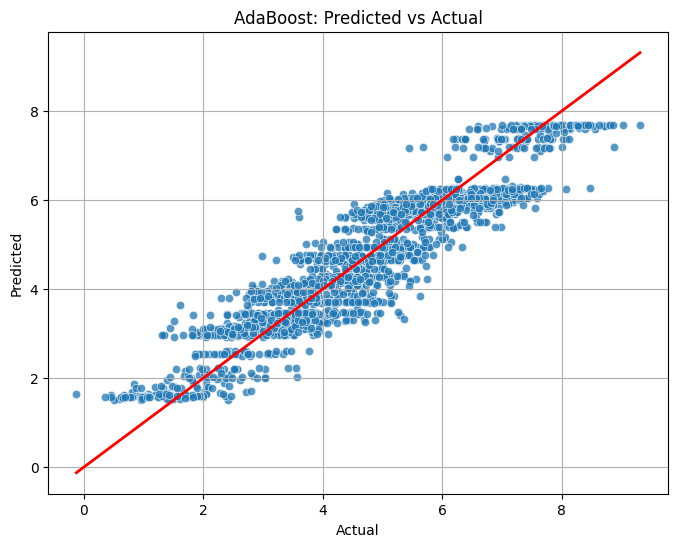

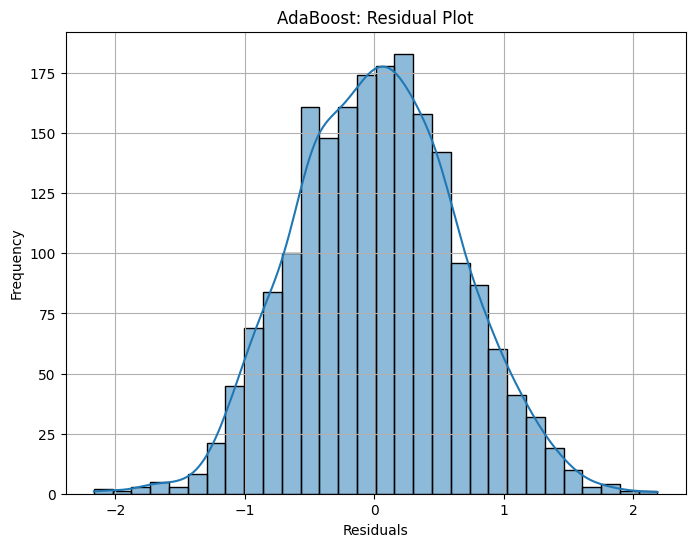

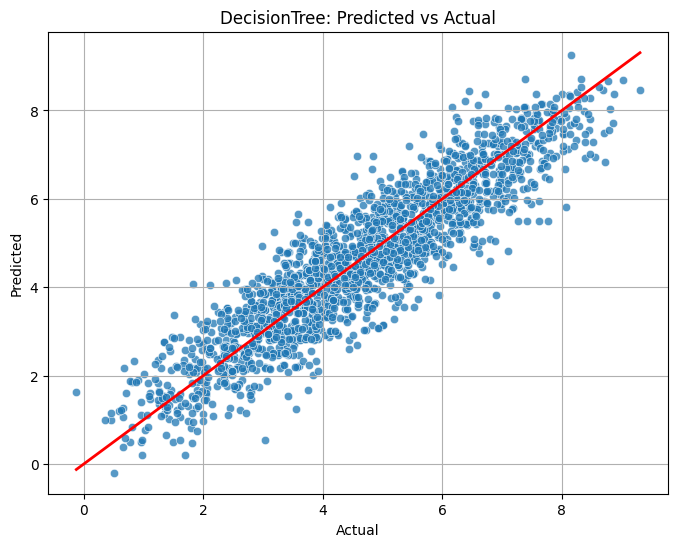

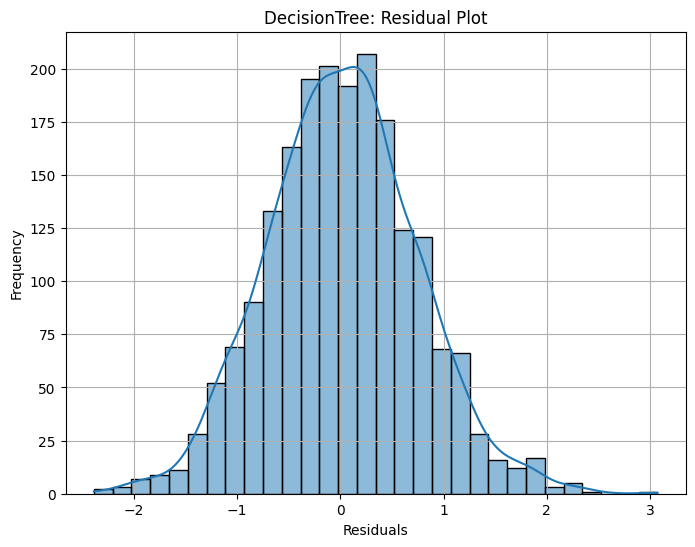

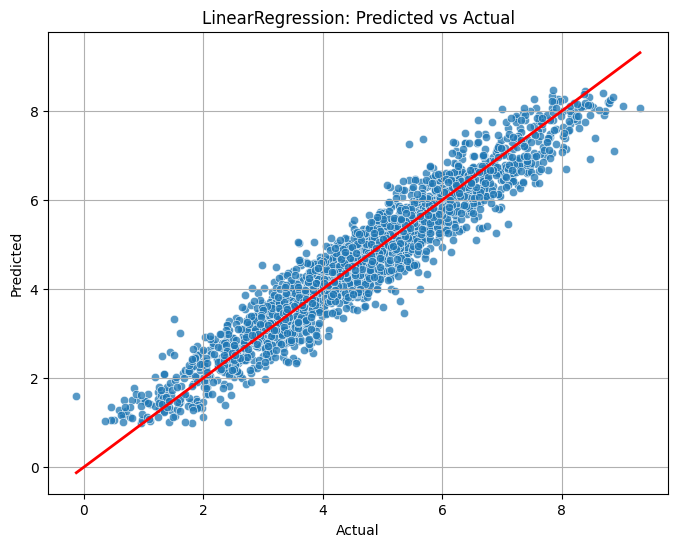

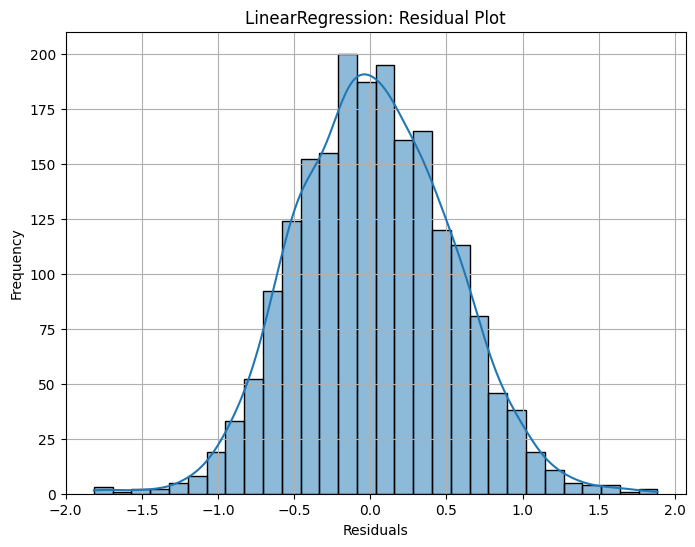

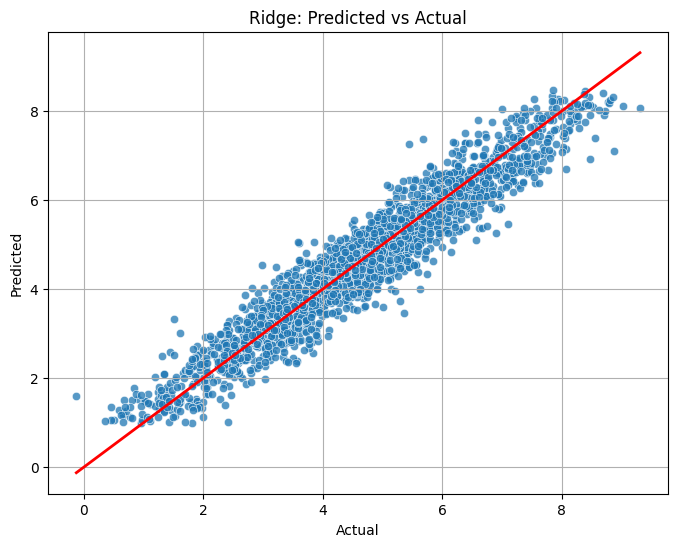

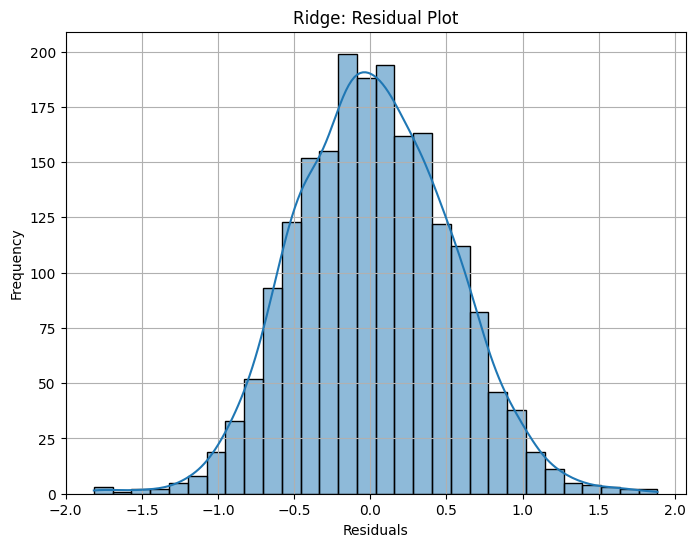

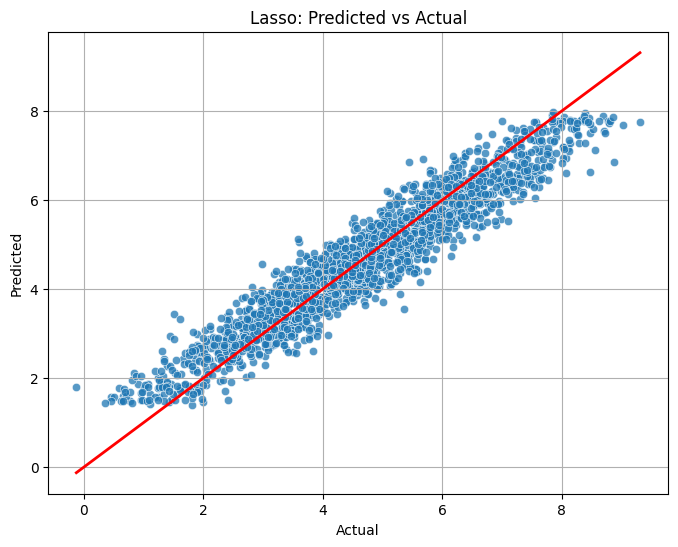

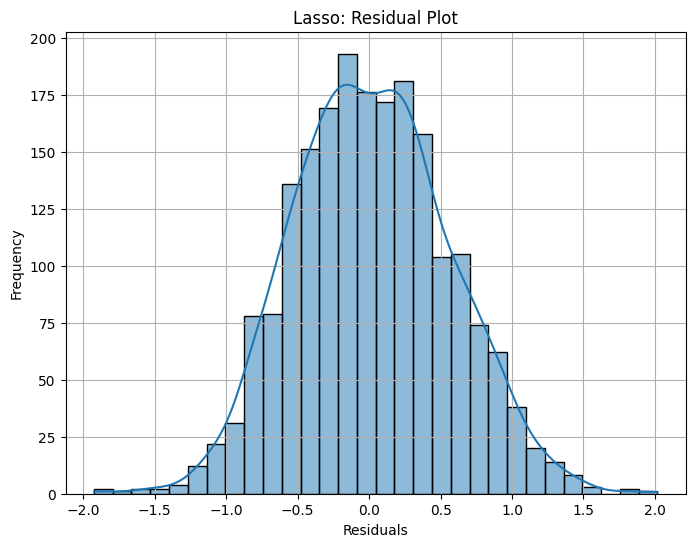

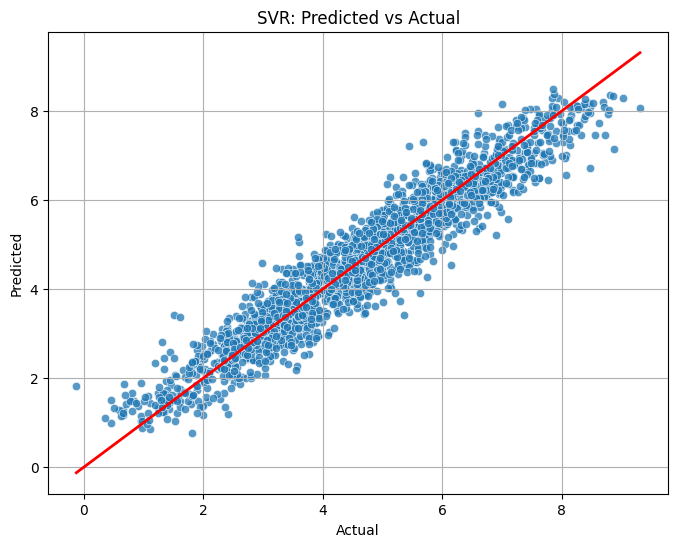

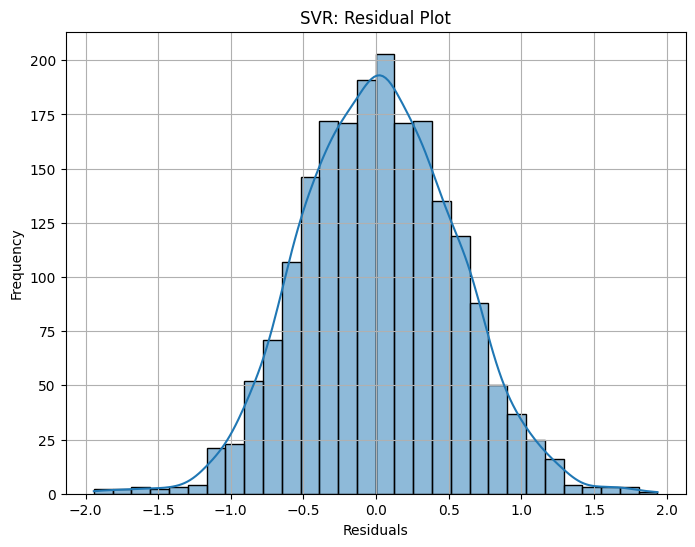

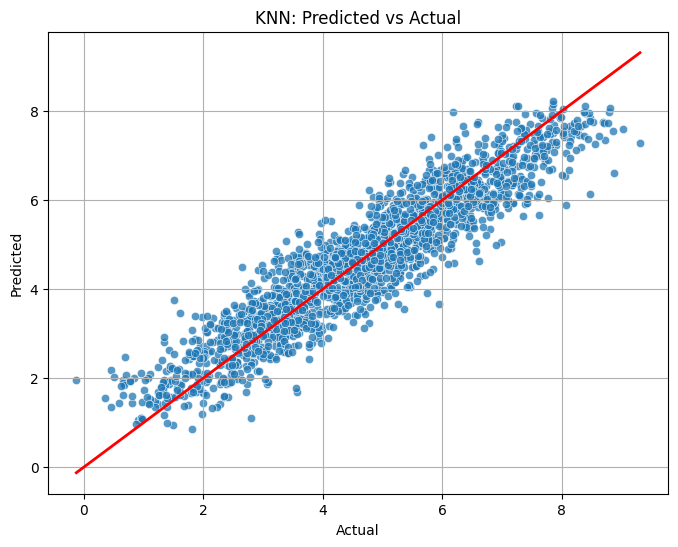

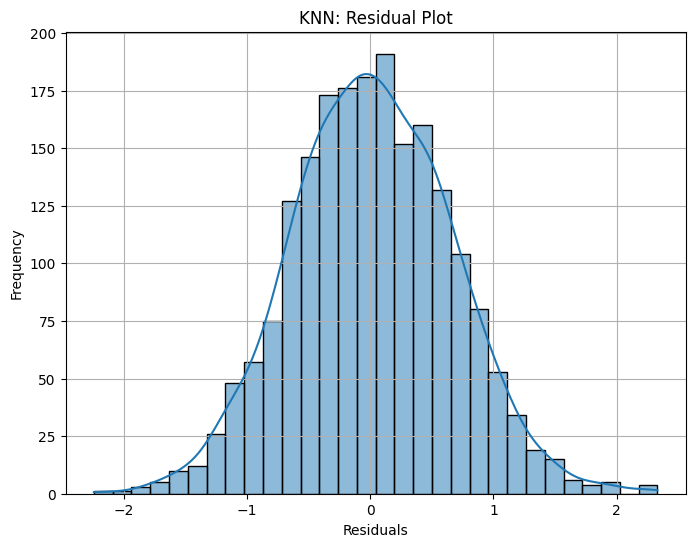

              Model   R2_score       MSE       MAE      RMSE       MAPE  \
6             Ridge  91.580715  0.252763  0.401420  0.502756  11.423894   
5  LinearRegression  91.580641  0.252765  0.401416  0.502758  11.422863   
2  GradientBoosting  91.304163  0.261066  0.408657  0.510946  11.643790   
8               SVR  90.914956  0.272751  0.416327  0.522255  12.010151   
1           XGBoost  90.607627  0.281977  0.426041  0.531015  12.146975   
0      RandomForest  90.566585  0.283209  0.427232  0.532174  12.144279   
7             Lasso  90.219033  0.293644  0.436838  0.541889  13.230527   
3          AdaBoost  87.203113  0.384187  0.498441  0.619828  14.441435   
9               KNN  86.039347  0.419126  0.516207  0.647399  15.285148   
4      DecisionTree  82.605544  0.522215  0.570978  0.722645  15.947903   

   Training Time (s)  
6           0.006643  
5           0.027096  
2           4.063601  
8           4.379000  
1           0.497807  
0          13.625588  
7           0

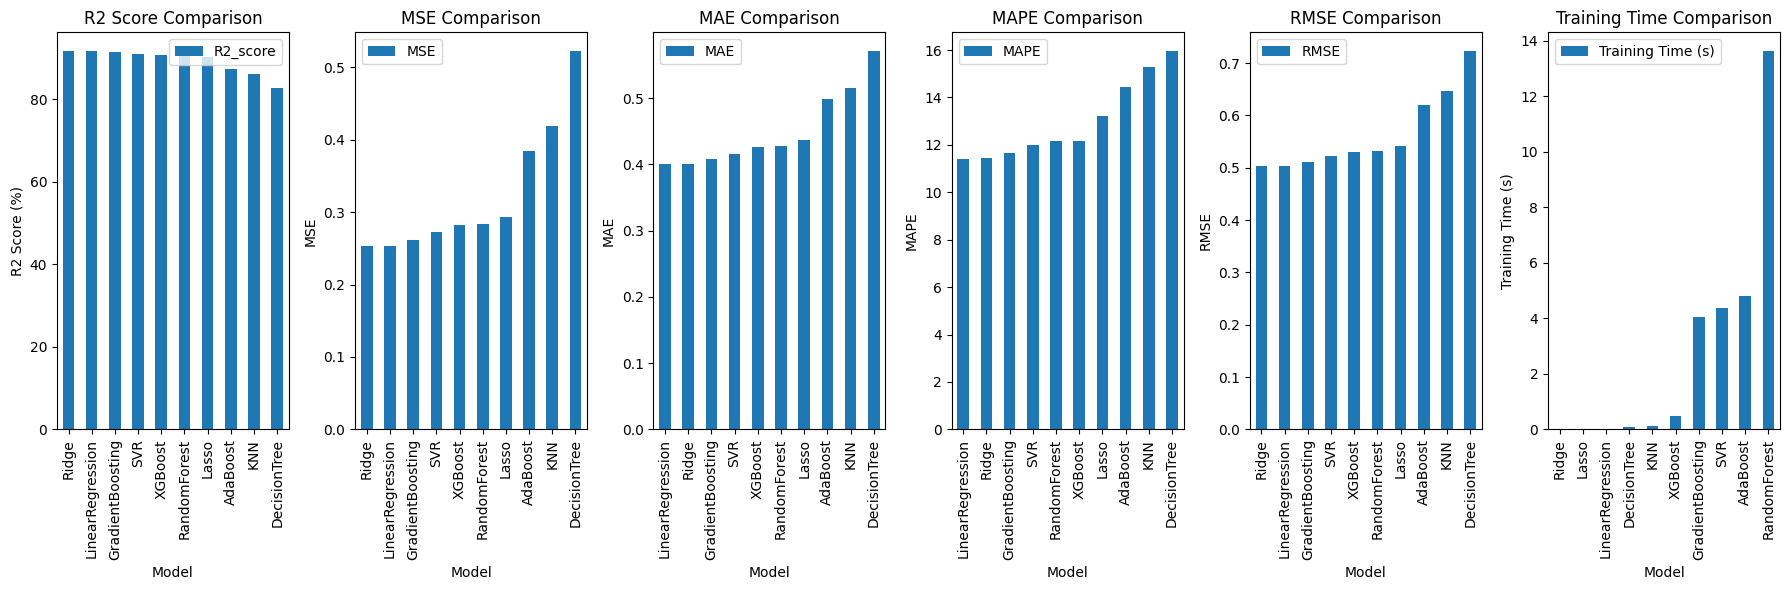


RandomForest Feature Importances:
               Feature  Importance
3          Rainfall_mm    0.613200
5      Fertilizer_Used    0.194974
6      Irrigation_Used    0.120725
4  Temperature_Celsius    0.028815
8      Days_to_Harvest    0.017440
2                 Crop    0.007617
1            Soil_Type    0.007367
0               Region    0.005566
7    Weather_Condition    0.004297


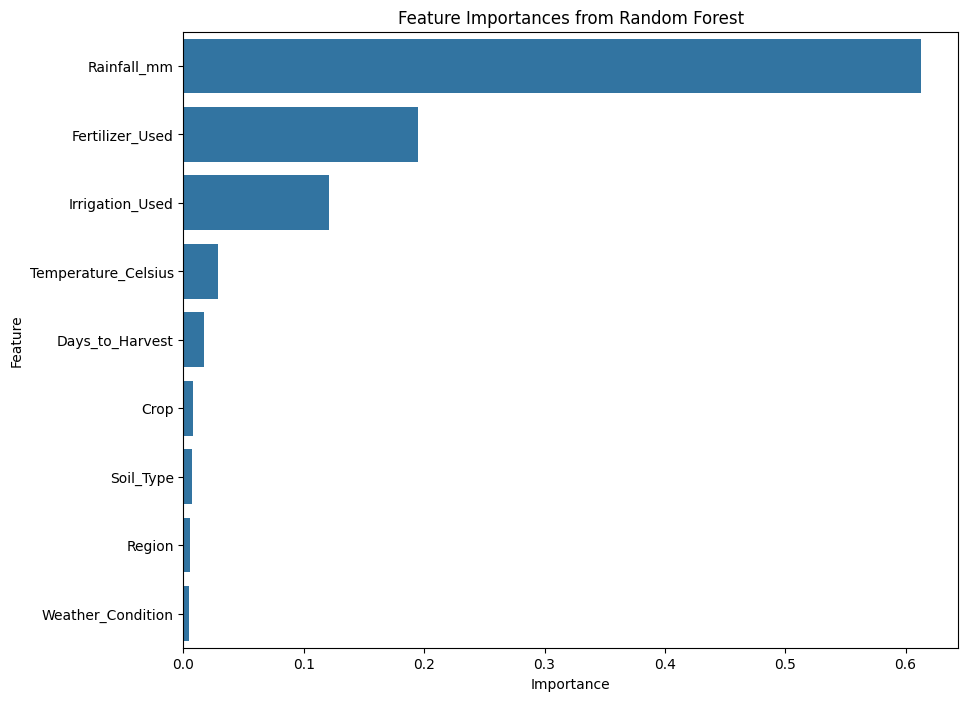


Ridge Regression Coefficients:
               Feature  Coefficient
3          Rainfall_mm     1.300187
5      Fertilizer_Used     0.751906
6      Irrigation_Used     0.599212
4  Temperature_Celsius     0.151489
7    Weather_Condition     0.008689
0               Region     0.005383
1            Soil_Type    -0.001773
2                 Crop    -0.002579
8      Days_to_Harvest    -0.004995


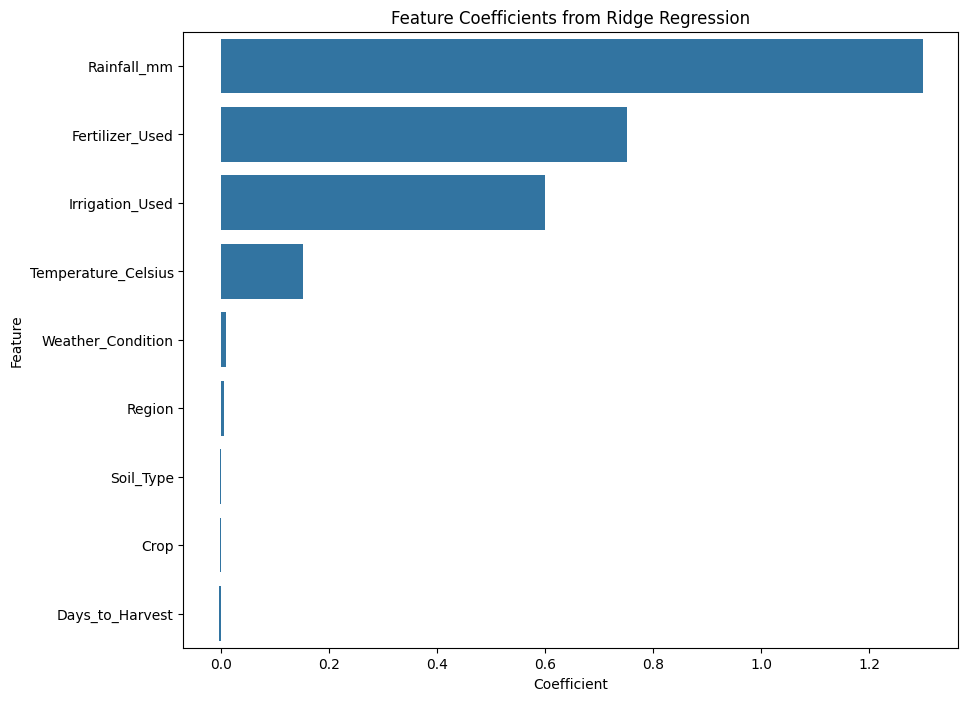

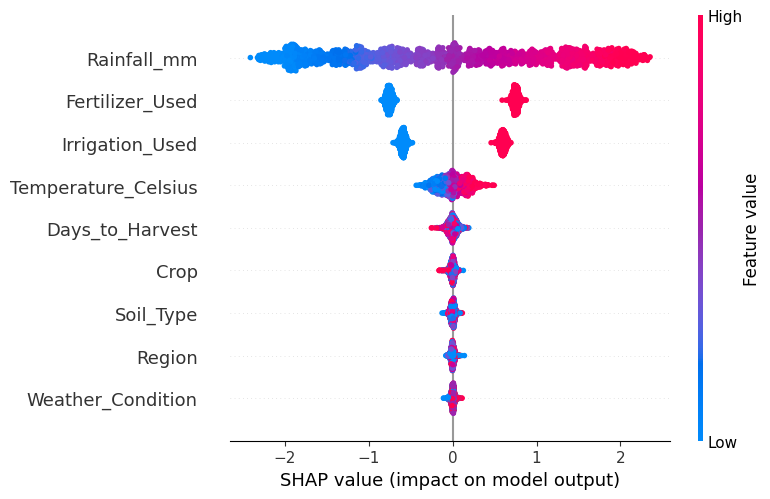

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import shap

# Load dataset
data = pd.read_csv('Dataset.csv')

data.dropna(inplace=True)  # Remove missing values

# Encode categorical variables
categorical_columns = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Feature scaling
scaler = StandardScaler()
numerical_columns = [col for col in data.columns if col != 'Yield_tons_per_hectare']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features (X) and target (y)
X = data.drop(columns=['Yield_tons_per_hectare'])
y = data['Yield_tons_per_hectare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with optimized hyperparameters
model_grids = {
    "RandomForest": RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=300, learning_rate=0.1, random_state=42),
    "DecisionTree": DecisionTreeRegressor(max_depth=20, random_state=42),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "SVR": SVR(C=1.0, kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='distance')
}

# Dictionary to store results
results = pd.DataFrame(columns=['Model', 'R2_score', 'MSE', 'MAE', 'RMSE', 'MAPE', 'Training Time (s)'])

# Train models and evaluate performance
for name, model in model_grids.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    r2 = r2_score(y_test, y_pred) * 100
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results = pd.concat([results, pd.DataFrame({"Model": [name], "R2_score": [r2], "MSE": [mse], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape], "Training Time (s)": [training_time]})], ignore_index=True)

    # Scatter plot of Actual vs Predicted values with high DPI
    plt.figure(figsize=(8, 6), dpi=100)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.75)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.title(f'{name}: Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

    # Residual plot with high DPI
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6), dpi=100)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'{name}: Residual Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Sort and display results
results = results.sort_values(by="R2_score", ascending=False)
print(results)

# ---------------- VISUALIZATION ----------------
fig, axes = plt.subplots(ncols=6, figsize=(18, 6), dpi=100)

# R2 Score plot
results.sort_values(by="R2_score", ascending=False).plot(x="Model", y="R2_score", kind="bar", ax=axes[0])
axes[0].set_title("R2 Score Comparison")
axes[0].set_ylabel("R2 Score (%)")

# MSE plot
results.sort_values(by="MSE", ascending=True).plot(x="Model", y="MSE", kind="bar", ax=axes[1])
axes[1].set_title("MSE Comparison")
axes[1].set_ylabel("MSE")

# MAE plot
results.sort_values(by="MAE", ascending=True).plot(x="Model", y="MAE", kind="bar", ax=axes[2])
axes[2].set_title("MAE Comparison")
axes[2].set_ylabel("MAE")

# MAPE plot
results.sort_values(by="MAPE", ascending=True).plot(x="Model", y="MAPE", kind="bar", ax=axes[3])
axes[3].set_title("MAPE Comparison")
axes[3].set_ylabel("MAPE")

# RMSE plot
results.sort_values(by="RMSE", ascending=True).plot(x="Model", y="RMSE", kind="bar", ax=axes[4])
axes[4].set_title("RMSE Comparison")
axes[4].set_ylabel("RMSE")

# TRAINING TIME (s) plot
results.sort_values(by="Training Time (s)", ascending=True).plot(x="Model", y="Training Time (s)", kind="bar", ax=axes[5])
axes[5].set_title("Training Time Comparison")
axes[5].set_ylabel("Training Time (s)")

plt.tight_layout()
plt.show()

# ---------------- FEATURE IMPORTANCE ----------------
# For RandomForest
best_rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42).fit(X_train, y_train)
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nRandomForest Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

# For Ridge Regression with high DPI
best_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
coefficients = best_ridge.coef_
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

print("\nRidge Regression Coefficients:")
print(coefficients_df)

plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients from Ridge Regression')
plt.show()

# SHAP Explainer for XGBoost
best_xgb = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42).fit(X_train, y_train)
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

plt.figure(dpi=100)
shap.summary_plot(shap_values, X_test)


# **END**